# Time to Ruin Calculation in a Decentralized Marketplace

## Failure Rate Calculation

1. **Individual Failure Rate ( $F_u$ )**:
   - Each user u has their own failure rate  $F_u$. This rate follows a long-tailed distribution where most users have low failure rates, and a few have higher rates due to malicious intent or frequent mistakes.

2. **Overall Task Failure Rate ( F )**:
   - The failure rate for a task depends on the failure rates of all four actors involved (requester, dApp provider, data provider, and computing provider).
   - The formula for calculating the failure rate of a task considering the failure rates of all participants can be given by:
     $$
     F = 1 - (1 - F_u) \cdot (1 - \text{mean}(F_u))^3
     $$
   - This formula considers the probability that at least one of the four actors fails, causing the task to fail.

## Time to Ruin Calculation

Given:
- $S_0$ = 1000 units (initial stake)
- P = 100 (penalty per task failure)
- R = 1 (task participation rate, using tasks as the time unit)
- F (failure rate for tasks)

We want to calculate the expected time to ruin (number of tasks until a participant’s stake is depleted).

### Expected Loss Per Task

For a given participant with failure rate  $F_u$ :
$$
L = F \times P
$$

### Stake Depletion Rate

Since  R = 1  task per time unit (tasks as the time unit):
$$
D = L = F \times P
$$

### Time to Ruin

The time to ruin,  T , is given by:
$$
T = \frac{S_0}{D} = \frac{S_0}{F \times P}
$$

## Incorporating the Failure Rate Formula

To apply this to a participant:

1. **Determine  $F_u$**:
   - Given the long-tailed distribution, determine the specific  F_u  for the participant.

2. **Calculate the Overall Task Failure Rate  F**:
   - Using the provided formula:
     $$
     F = 1 - (1 - F_u) \cdot (1 - \text{mean}(F_u))^3
     $$

# Time to Ruin with Recovery Mechanism

## Introducing a Recovery Mechanism

1. **Recovery Rate ( $R_r$ )**:
   - Define a recovery rate $R_r$ which represents the amount a user recovers per successful task.

2. **Probability of Success ( $1 - F$ )**:
   - The probability of a task being successful is $1 - F$.

3. **Net loss in Stake ( $L_{\text{net}}$ )**:
   - The net loss per task will now be the penalty incurred for a failure minus the recovery from a success.

## Formula for Time to Ruin with Recovery

Let's denote:
- $S_0$ as the initial stake.
- $P$ as the penalty per task failure.
- $R_r$ as the recovery per successful task.
- $F$ as the task failure rate.

The expected loss per task without recovery:
$$ L = F \times P $$

The expected recovery per task:
$$ R = (1 - F) \times R_r $$

The net expected loss in stake per task:
$$ L_{\text{net}} = L - R = F \times P - (1 - F) \times R_r $$

To ensure that the model is coherent, $L_{\text{net}}$ should be positive, implying that users are more likely to lose stake than gain it. However, in some scenarios, it might be possible for $L_{\text{net}}$ to be zero or negative, meaning the user never runs out of stake or increases their stake over time. We will assume $L_{\text{net}} > 0$ for the ruin theory to hold.

## Time to Ruin with Recovery
The time to ruin $T$ can be calculated as:
$$ T = \frac{S_0}{L_{\text{net}}} = \frac{S_0}{F \times P - (1 - F) \times R_r} $$

## Example Calculation

Assume:
- $S_0 = 1000$ units (initial stake)
- $P = 100$ units (penalty per task failure)
- $R_r = 10$ units (recovery per successful task)
- $F = 0.2$ (task failure rate)

The expected loss per task:
$$ L = 0.2 \times 100 = 20 $$

The expected recovery per task:
$$ R = (1 - 0.2) \times 10 = 0.8 \times 10 = 8 $$

The net expected loss in stake per task:
$$ L_{\text{net}} = 20 - 8 = 12 $$

The time to ruin:
$$ T = \frac{1000}{12} \approx 83.33 \text{ tasks} $$


In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the overall task failure rate
def calculate_failure_rate(F_u, mean_F_u):
    return 1 - (1 - F_u) * (1 - mean_F_u) ** 3

# Function to calculate the net loss in stake per task
def net_loss_per_task(F, P, R_r):
    return F * P - (1 - F) * R_r

# Parameters
S_0 = 1000  # initial stake
P = 100     # penalty per task failure
R_r = 25    # recovery per successful task

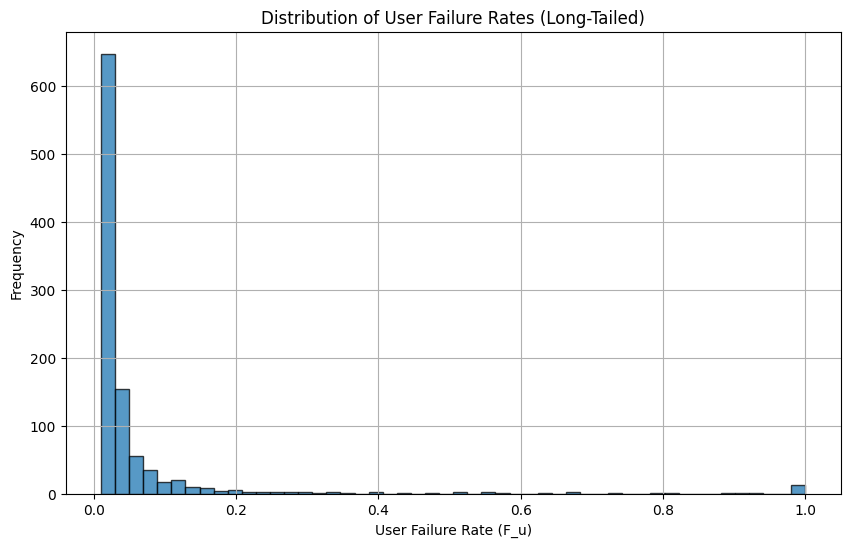

In [81]:
# Generate a long-tailed distribution for user failure rates (F_u)
shape, scale = 1.0, 0.01  # shape (alpha) and scale (xmin) parameters for the Pareto distribution
F_u_values = (np.random.pareto(shape, 1000) + 1) * scale

# Ensure that failure rates are within a realistic range [0, 1]
F_u_values = np.clip(F_u_values, 0, 1)

# Plot the distribution of user failure rates
plt.figure(figsize=(10, 6))
plt.hist(F_u_values, bins=50, alpha=0.75, edgecolor='black')
plt.xlabel('User Failure Rate (F_u)')
plt.ylabel('Frequency')
plt.title('Distribution of User Failure Rates (Long-Tailed)')
plt.grid(True)
plt.show()


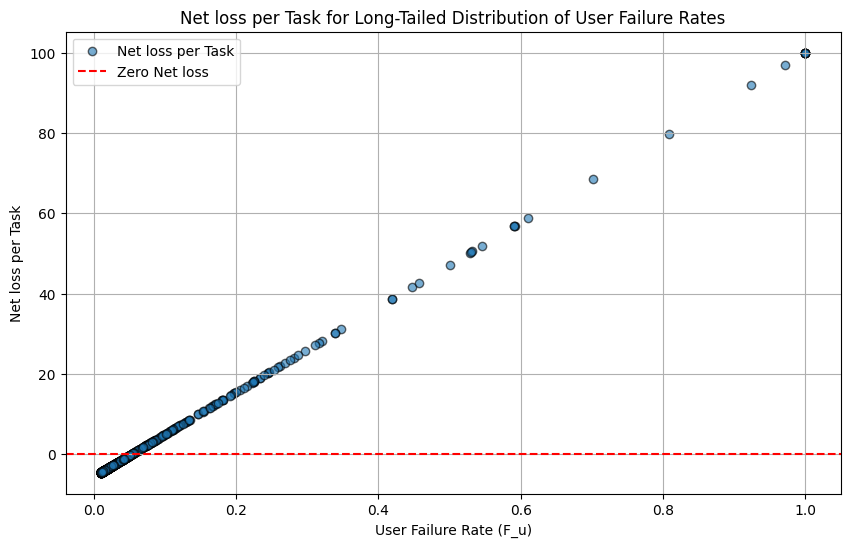

In [82]:
# Generate a long-tailed distribution for user failure rates (F_u)
shape, scale = 1.0, 0.01  # shape (alpha) and scale (xmin) parameters for the Pareto distribution
F_u_values = (np.random.pareto(shape, 1000) + 1) * scale

# Ensure that failure rates are within a realistic range [0, 1]
F_u_values = np.clip(F_u_values, 0, 1)

# Calculate the mean failure rate from the generated distribution
mean_F_u = np.mean(F_u_values)

# Calculate overall task failure rate and net loss per task for each user failure rate
F_values = calculate_failure_rate(F_u_values, mean_F_u)
L_net_values = net_loss_per_task(F_values, P, R_r)

# Plot the net loss per task for the long-tailed distribution of user failure rates
plt.figure(figsize=(10, 6))
plt.scatter(F_u_values, L_net_values, alpha=0.6, edgecolor='black', label='Net loss per Task')
plt.axhline(0, color='r', linestyle='--', label='Zero Net loss')
plt.xlabel('User Failure Rate (F_u)')
plt.ylabel('Net loss per Task')
plt.title('Net loss per Task for Long-Tailed Distribution of User Failure Rates')
plt.legend()
plt.grid(True)
plt.show()